# Proyek ML - FACE RECOGNITION UNTUK PENGENALAN IDENTITAS

## Permasalahan  yang dihadapi

### Penjelasan

Permasalahan yang mendasari pembuatan proyek face recognition adalah keterbatasan sistem identifikasi yang masih bergantung pada metode manual seperti kartu identitas atau input PIN, yang rentan terhadap pemalsuan, pencurian, dan human error. Dalam situasi seperti pengawasan keamanan, absensi otomatis, atau sistem akses terbatas, dibutuhkan metode yang cepat, akurat, dan tidak mudah disalahgunakan. Teknologi pengenalan wajah hadir sebagai solusi untuk meningkatkan efisiensi dan keamanan dengan cara mengenali identitas seseorang secara otomatis berdasarkan ciri khas wajah mereka.

## Alasan pemilihan data


### Penjelasan

Dalam proyek ini, metode pengumpulan data dilakukan dengan mendaftarkan setiap individu baru melalui proses pengambilan gambar burst menggunakan kamera selama 2,5 detik. Dari proses ini, diperoleh sekitar 50 gambar grayscale per individu.

Metode ini dipilih karena beberapa alasan utama:

Cepat dan Efisien: Dengan durasi hanya 2,5 detik, proses registrasi pengguna menjadi sangat cepat tanpa mengganggu kenyamanan.

Volume Data yang Memadai: Sekitar 50 gambar per individu cukup untuk membangun representasi wajah yang baik di tahap awal, sehingga memungkinkan model mengenali identitas dengan lebih akurat.

Kemudahan Implementasi: Teknik burst capture sederhana diintegrasikan dalam berbagai perangkat kamera standar tanpa memerlukan alat tambahan atau prosedur yang rumit.

Namun, pendekatan ini juga memiliki keterbatasan, yakni:

Kurangnya Variasi: Karena pengambilan gambar terjadi dalam waktu singkat dan dalam kondisi relatif seragam, variasi ekspresi wajah, sudut pandang, pencahayaan, dan latar belakang menjadi terbatas. Hal ini dapat mempengaruhi kemampuan model dalam menghadapi perubahan kondisi nyata di luar dataset.

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


## EDA

### EDA_age

                        filename  ID gender  age    x    y    w    h  \
0  ./data/at/Herdinand/001_0.pgm   1      M   19  588  247   45   45   
1  ./data/at/Herdinand/001_1.pgm   1      M   19  300  306  156  156   
2  ./data/at/Herdinand/001_2.pgm   1      M   19  308  306  143  143   
3  ./data/at/Herdinand/001_3.pgm   1      M   19  308  306  143  143   
4  ./data/at/Herdinand/001_4.pgm   1      M   19  304  304  148  148   

   timestamp  
0   0.988705  
1   0.989373  
2   1.044549  
3   1.110132  
4   1.159907  


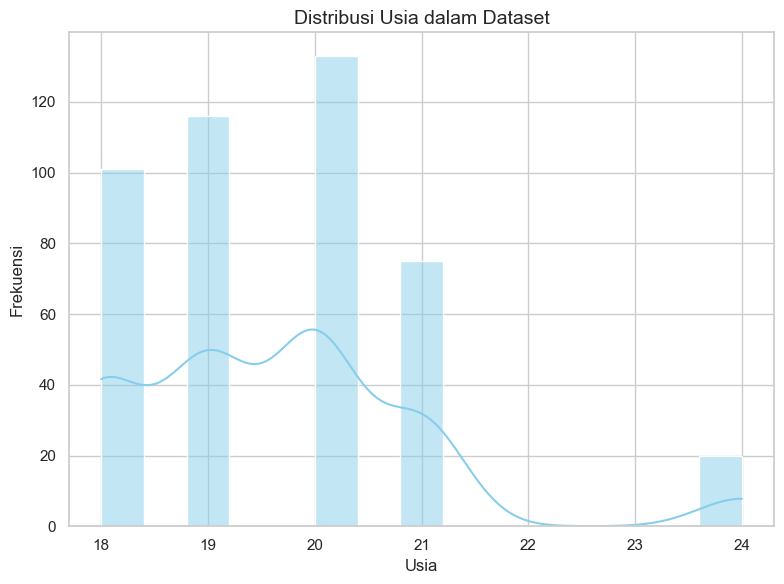

C:\Users\herdi\AppData\Local\Temp\ipykernel_15144\1590547196.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='age', data=df, palette='Set2')


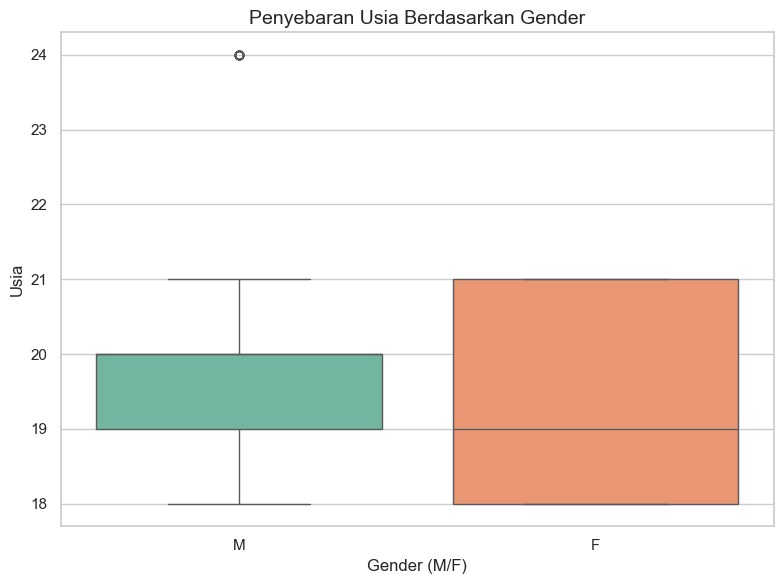

In [2]:
# Load data CSV
csv_path = './data/at/features.csv'  # Sesuaikan path kalau berbeda
df = pd.read_csv(csv_path)

# Cek beberapa data awal
print(df.head())

# Set style for better looking plots
sns.set(style="whitegrid")

# --- Visualisasi 1: Histogram Sebaran Usia ---
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, color='skyblue', bins=15)

plt.title('Distribusi Usia dalam Dataset', fontsize=14)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.tight_layout()
plt.show()

# --- Visualisasi 2: Boxplot Usia Berdasarkan Gender ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=df, palette='Set2')

plt.title('Penyebaran Usia Berdasarkan Gender', fontsize=14)
plt.xlabel('Gender (M/F)', fontsize=12)
plt.ylabel('Usia', fontsize=12)
plt.tight_layout()
plt.show()


### EDA_gender


                        filename  ID gender  age    x    y    w    h  \
0  ./data/at/Herdinand/001_0.pgm   1      M   19  588  247   45   45   
1  ./data/at/Herdinand/001_1.pgm   1      M   19  300  306  156  156   
2  ./data/at/Herdinand/001_2.pgm   1      M   19  308  306  143  143   
3  ./data/at/Herdinand/001_3.pgm   1      M   19  308  306  143  143   
4  ./data/at/Herdinand/001_4.pgm   1      M   19  304  304  148  148   

   timestamp  
0   0.988705  
1   0.989373  
2   1.044549  
3   1.110132  
4   1.159907  


C:\Users\herdi\AppData\Local\Temp\ipykernel_15144\643606730.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


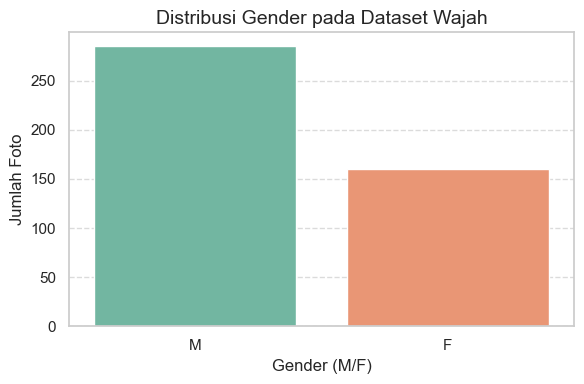

In [3]:
# Load data CSV
csv_path = './data/at/features.csv'  # Sesuaikan path kalau berbeda
df = pd.read_csv(csv_path)

# Cek beberapa data awal
print(df.head())

# Visualisasi distribusi gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='Set2')

plt.title('Distribusi Gender pada Dataset Wajah', fontsize=14)
plt.xlabel('Gender (M/F)', fontsize=12)
plt.ylabel('Jumlah Foto', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Penjelasan

Pada tahap awal EDA ini, dataset dibaca dari file CSV dan diperiksa dengan menampilkan lima baris pertama untuk mendapatkan gambaran umum mengenai struktur data. Selanjutnya, visualisasi pertama berupa histogram digunakan untuk menggambarkan distribusi usia dalam dataset. Dengan menambahkan kurva KDE (Kernel Density Estimate), distribusi usia terlihat lebih halus dan memberikan gambaran apakah data terdistribusi merata atau condong ke kelompok usia tertentu. Visualisasi kedua, berupa boxplot, digunakan untuk membandingkan distribusi usia berdasarkan gender. Boxplot ini memungkinkan kita untuk melihat perbedaan median, kuartil, serta outlier pada data usia antara laki-laki dan perempuan, memberikan wawasan apakah terdapat perbedaan signifikan dalam usia antara kedua gender tersebut. Visualisasi ketiga adalah countplot yang menunjukkan distribusi jumlah data berdasarkan gender. Ini berguna untuk mengetahui proporsi antara jumlah laki-laki dan perempuan dalam dataset, yang bisa mengindikasikan apakah ada ketidakseimbangan dalam representasi gender di dataset. Secara keseluruhan, EDA ini membantu memberikan gambaran awal yang jelas tentang distribusi usia dan gender dalam dataset, yang dapat menjadi dasar untuk analisis lebih lanjut.

Disini kita menggunakan data pria sebanyak 7 orang dan data perempuan sebanyak 6 orang, namun terdapat perbedaan yang hampir 2 kali lipat jumlah pria lebih banyak  hal ini mungkin modul haarcascade yang kita gunakan sebagai pendeteksi wajah akan menyimpan file apabila terdeteksi wajah pada setiap orang.

Dapat dilihat bahwa jika mayoritas dari sampel berusia antara 18-21 berarti mayoritas dari angkatan 24, 23 dan 22. namun ada pencilan yang memiliki usia 24 tahun karena ada salah satu sampel angkatan 23 yang sudah berusia 24. Disini dapat kita lihat juga bahwa frekuensi nya kisaran ratusan, hal ini dikarenakan 1 orang kita mengambil sekitar 50 foto.

Kita juga dapat lihat bahwa tentang usia pada perempuan lebih tersebar, karena kita lebih banyak menggunakan foto perempuan di angkatan yang berbeda-beda, sedangkan pada kita menggunakan data pria kebanyakan pada angkatan 23 atau 24 saja.

## Data Preprocessing

### Resize image

In [4]:
# Fungsi untuk melakukan resize, normalisasi, dan simpan gambar hasil preprocessing
def preprocess_and_save_images(input_folder, output_folder, target_size=(100, 100)):
    images = []
    labels = []
    image_paths = []

    # Buat folder output jika belum ada
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop semua file gambar
    for filename in os.listdir(input_folder):
        if filename.endswith('.pgm'):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar dalam grayscale
            img = cv2.resize(img, target_size)  # Resize gambar

            # Normalisasi pixel
            img_normalized = img / 255.0

            images.append(img_normalized)
            image_paths.append(img_path)

            # Simpan gambar yang sudah diproses
            save_path = os.path.join(output_folder, filename)
            img_to_save = (img_normalized * 255).astype(np.uint8)  # Konversi kembali ke 0-255 untuk disimpan
            cv2.imwrite(save_path, img_to_save)  # Save image hasil normalisasi

    return np.array(images), image_paths

# Fungsi untuk preprocessing data CSV
def preprocess_csv(csv_path):
    df = pd.read_csv(csv_path)

    # Encode label ID
    label_encoder = LabelEncoder()
    df['ID'] = label_encoder.fit_transform(df['ID'])

    # Extract features
    df_features = df[['age', 'gender', 'timestamp']].copy()

    # Encode gender
    df_features['gender'] = df_features['gender'].map({'M': 1, 'F': 0})

    return df_features, label_encoder

# Path input dan output
input_folder = './data/at/Herdinand'   # Folder asli
output_folder = './data/at/processed'  # Folder hasil preprocessing
csv_path = './data/at/features.csv'

# Jalankan preprocessing dan simpan hasil
images, image_paths = preprocess_and_save_images(input_folder, output_folder)

# Preprocess CSV untuk fitur tambahan
features, label_encoder = preprocess_csv(csv_path)

# Cek hasil
print(f"Jumlah gambar diproses dan disimpan: {len(images)}")
print(f"Beberapa fitur:\n{features.head()}")

Jumlah gambar diproses dan disimpan: 445
Beberapa fitur:
   age  gender  timestamp
0   19       1   0.988705
1   19       1   0.989373
2   19       1   1.044549
3   19       1   1.110132
4   19       1   1.159907


Gambar-gambar dengan format .pgm dari folder input dibaca dalam mode grayscale, diresize ke ukuran 100x100 piksel, dinormalisasi ke rentang 0–1, lalu disimpan kembali ke folder output setelah dikonversi ke skala 0–255. Selain itu, data CSV yang berisi informasi tambahan seperti umur, gender, dan timestamp diproses dengan mengubah label ID menjadi angka menggunakan LabelEncoder dan mengubah nilai gender menjadi format numerik (M=1, F=0). Hasil dari proses ini adalah array gambar yang sudah siap digunakan serta dataframe fitur tambahan yang telah dibersihkan dan dinormalisasi. Proses ini memastikan bahwa baik data gambar maupun data tabular berada dalam format yang konsisten dan optimal untuk tahap modeling berikutnya.

### Histogram Equalization

In [5]:
def preprocess_images_with_histogram_equalization(image_folder, output_folder, target_size=(100, 100)):
    images1 = []
    labels1 = []
    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(image_folder):
        if filename.endswith('.pgm'):
            img_path1 = os.path.join(image_folder, filename)
            img1 = cv2.imread(img_path1, cv2.IMREAD_GRAYSCALE)
            img1 = cv2.resize(img1, target_size)
            
            # Histogram Equalization untuk meningkatkan kontras
            img_eq = cv2.equalizeHist(img1)
            
            # Normalisasi pixel 0-1
            img_eq_normalized = img_eq / 255.0
            
            images1.append(img_eq_normalized)
            labels1.append(filename)

            # Simpan ke output folder
            save_path = os.path.join(output_folder, filename)
            img_to_save = (img_eq_normalized * 255).astype(np.uint8)
            cv2.imwrite(save_path, img_to_save)
    
    return np.array(images), labels1

# Fungsi preprocessing CSV (bisa sama seperti sebelumnya)
def preprocess_csv(csv_path):
    df = pd.read_csv(csv_path)

    # Encode label ID
    label_encoder = LabelEncoder()
    df['ID'] = label_encoder.fit_transform(df['ID'])
    
    # Encode gender
    df['gender'] = df['gender'].map({'M': 1, 'F': 0})
    
    # Isi missing value jika ada
    if df['age'].isnull().sum() > 0:
        df['age'] = df['age'].fillna(df['age'].median())
    if df['timestamp'].isnull().sum() > 0:
        df['timestamp'] = df['timestamp'].fillna(df['timestamp'].mean())

    return df

# Path ke folder dan CSV
image_folder = './data/at/Herdinand'
output_folder1 = './data/at/processed_hist_eq'  
csv_path = './data/at/features.csv'

# Preprocessing dengan histogram equalization
images1, labels1 = preprocess_images_with_histogram_equalization(image_folder, output_folder1)

# Preprocessing CSV
features1 = preprocess_csv(csv_path)

# Cek hasil
print(f"Jumlah gambar setelah histogram equalization: {len(images)}")
print(f"Beberapa data fitur: {features.head()}")


Jumlah gambar setelah histogram equalization: 445
Beberapa data fitur:    age  gender  timestamp
0   19       1   0.988705
1   19       1   0.989373
2   19       1   1.044549
3   19       1   1.110132
4   19       1   1.159907


### Penjelasan

Pada kode ini, dua jenis preprocessing diterapkan pada data gambar dan data CSV untuk mempersiapkan data sebelum digunakan dalam model machine learning. Fungsi pertama, preprocess_and_save_images, digunakan untuk memproses gambar. Gambar dibaca dari folder input dalam format grayscale, kemudian diubah ukurannya menjadi ukuran target (100x100 piksel). Setelah itu, nilai pixel gambar dinormalisasi ke rentang 0-1 untuk meningkatkan kestabilan model saat melatih. Gambar yang sudah diproses kemudian disimpan di folder output dengan format yang sudah dinormalisasi. Fungsi ini juga mengembalikan array gambar yang sudah diproses dan daftar path gambar yang diproses. Fungsi kedua, preprocess_csv, digunakan untuk memproses data CSV yang berisi fitur terkait gambar, seperti usia, gender, dan timestamp. Di sini, ID pengguna dienkode dengan LabelEncoder agar dapat digunakan dalam analisis lebih lanjut, dan gender diubah menjadi nilai numerik (1 untuk laki-laki, 0 untuk perempuan). Selain itu, fungsi ini menangani nilai yang hilang (missing values) pada kolom usia dan timestamp dengan mengisinya dengan median dan rata-rata, masing-masing.

Di sisi lain, fungsi preprocess_images_with_histogram_equalization memperkenalkan proses tambahan pada gambar, yaitu histogram equalization. Ini bertujuan untuk meningkatkan kontras gambar, terutama jika gambar tersebut memiliki kontras rendah. Setelah gambar diproses dengan histogram equalization, gambar tersebut juga diubah ukurannya, dinormalisasi, dan disimpan dengan cara yang sama seperti fungsi pertama. Data CSV diproses dengan cara yang serupa seperti sebelumnya, namun kali ini juga menangani missing values jika ada, terutama pada kolom usia dan timestamp.

Secara keseluruhan, kedua bagian preprocessing ini bertujuan untuk mempersiapkan gambar dan fitur dalam dataset dengan cara yang standar dan konsisten, yang dapat meningkatkan kinerja model machine learning saat menggunakan data yang telah diproses.

## Pelatihan dan Penyetelan Model

### Logistic Regression

Ukuran Train: (356, 10000), Ukuran Test: (89, 10000)

=== Evaluasi Logistic Regression Sebelum Tuning ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         5

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00     

c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(



=== Hasil Grid Search ===
Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.9971988795518207

=== Evaluasi Logistic Regression Setelah Tuning ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         5

    accuracy                           1.00        89
   macro avg   

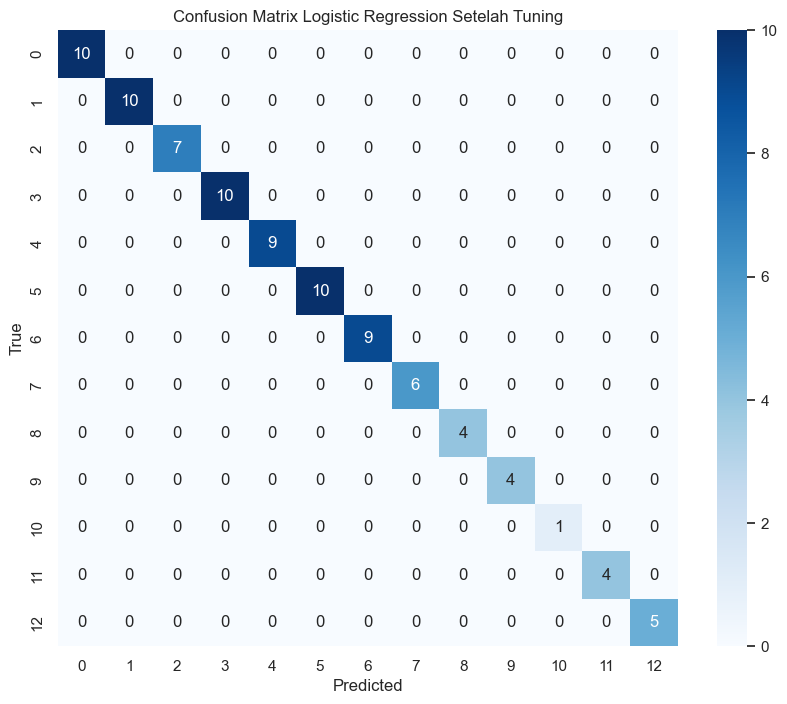

In [6]:
# 1. Preprocessing gambar
images, _ = preprocess_and_save_images(input_folder, output_folder) #Bisa diganti dengan HE

# 2. Preprocessing CSV
csv_path = './data/at/features.csv'
def preprocess_csv(csv_path):
    df = pd.read_csv(csv_path)
    le = LabelEncoder()
    df['ID'] = le.fit_transform(df['ID'])
    return df, le
features, label_encoder = preprocess_csv(csv_path)

# 3. Siapkan X dan y
X = images.reshape(len(images), -1)  # dari gambar (200x200) ke 40000 fitur
y = features['ID'].values            # ambil label ID user


# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Ukuran Train: {X_train.shape}, Ukuran Test: {X_test.shape}")

# ===================
# Model Training (Logistic Regression biasa)
# ===================
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Prediksi
y_pred = logreg.predict(X_test)

# Evaluasi
print("\n=== Evaluasi Logistic Regression Sebelum Tuning ===")
print(classification_report(y_test, y_pred))

# ===================
# Model Tuning (Grid Search untuk Logistic Regression)
# ===================
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga']
}

cv = StratifiedKFold(n_splits=3)

grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n=== Hasil Grid Search ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# ===================
# Evaluasi Model Terbaik dari Grid Search
# ===================
best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test)

print("\n=== Evaluasi Logistic Regression Setelah Tuning ===")
print(classification_report(y_test, y_pred_best))

# ===================
# (Opsional) Visualisasi Confusion Matrix
# ===================
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression Setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Pertama, gambar dipreproses melalui normalisasi dan resize, sedangkan data fitur dari file CSV dipreproses dengan encoding label ID. Gambar kemudian diratakan menjadi vektor fitur dan dibagi menjadi data latih dan data uji secara stratified untuk menjaga proporsi kelas. Model awal menggunakan Logistic Regression tanpa tuning, dan hasil evaluasinya dilaporkan menggunakan classification report. Untuk meningkatkan performa, dilakukan Grid Search dengan Stratified K-Fold Cross Validation untuk mencari kombinasi hyperparameter terbaik (nilai regularisasi C dan jenis solver). Setelah tuning, model Logistic Regression terbaik diuji kembali, dan performanya dievaluasi menggunakan classification report serta divisualisasikan dengan confusion matrix. Proses ini menunjukkan pendekatan yang sistematis untuk membangun model machine learning yang lebih optimal melalui preprocessing, training awal, hyperparameter tuning, dan evaluasi akhir.

Dapat dilihat pada saat menggunakan Logistic Regression precision, recall, f1-score dan juga accuracy semuanya memiliki nilai 1.00 dimana hal ini berarti tidak ada kesalahan dalam memprediksi wajah seseorang. Kita juga dapat melihat sebelum dan setelah tunning, hasilnya adalah sama yang berarti kita sudah menggunakan parameter terbaik ketika pertama kali menjalankan prediksi tanpa harus mencoba semua kemungkinan parameter.

### Random Forest

Ukuran Train: (356, 10000), Ukuran Test: (89, 10000)

=== Evaluasi Random Forest Sebelum Tuning ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         5

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00 

c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



=== Hasil Grid Search Random Forest ===
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.9859546165884193

=== Evaluasi Random Forest Setelah Tuning ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         5

    accuracy             

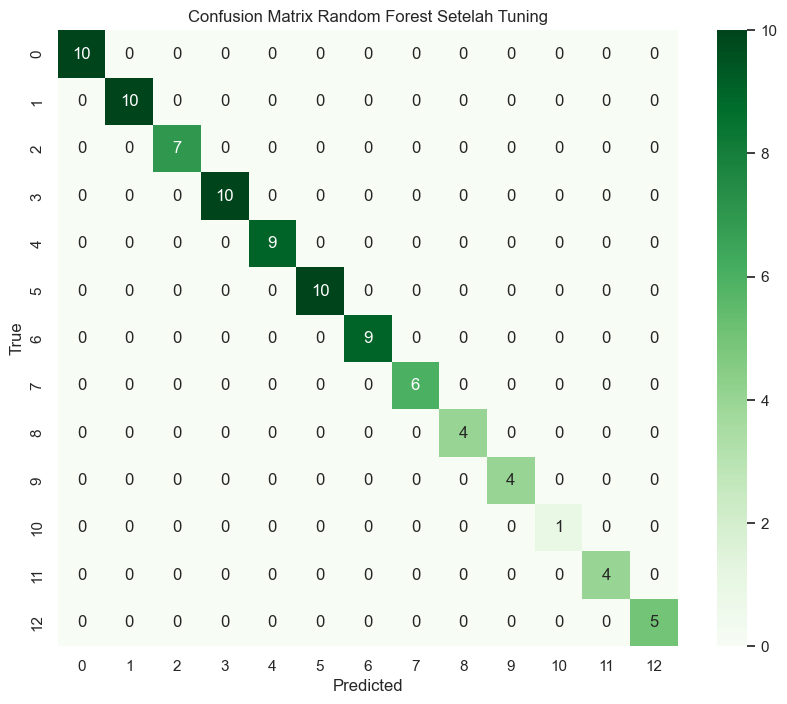

In [7]:
# 1. Preprocessing gambar
images, _ = preprocess_and_save_images(input_folder, output_folder) #Bisa diganti dengan HE

# 2. Preprocessing CSV
csv_path = './data/at/features.csv'
def preprocess_csv(csv_path):
    df = pd.read_csv(csv_path)
    le = LabelEncoder()
    df['ID'] = le.fit_transform(df['ID'])
    return df, le
features, label_encoder = preprocess_csv(csv_path)

# 3. Siapkan X dan y
X = images.reshape(len(images), -1)  # dari gambar (200x200) ke 40000 fitur
y = features['ID'].values            # ambil label ID user

# ===================================
# Split Data
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Ukuran Train: {X_train.shape}, Ukuran Test: {X_test.shape}")

# ===================================
# Training Model Random Forest
# ===================================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi Awal
print("\n=== Evaluasi Random Forest Sebelum Tuning ===")
print(classification_report(y_test, y_pred_rf))

# ===================================
# Tuning Model Random Forest (Grid Search)
# ===================================
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

cv = StratifiedKFold(n_splits=5)

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

print("\n=== Hasil Grid Search Random Forest ===")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_rf.best_score_}")

# ===================================
# Evaluasi Model Terbaik Setelah Tuning
# ===================================
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\n=== Evaluasi Random Forest Setelah Tuning ===")
print(classification_report(y_test, y_pred_best_rf))

# ===================================
# Visualisasi Confusion Matrix
# ===================================
cm_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Random Forest Setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Gambar dipreproses dengan normalisasi dan resize, lalu fitur tambahan dipersiapkan dari data CSV dengan encoding ID. Setelah gambar diratakan menjadi vektor fitur, dataset dibagi menjadi data latih dan uji dengan stratifikasi label. Model Random Forest awal dilatih dan dievaluasi, menghasilkan baseline performa. Untuk meningkatkan hasil, dilakukan Grid Search dengan Stratified K-Fold Cross Validation untuk mencari kombinasi terbaik dari hyperparameter seperti jumlah pohon (n_estimators), kedalaman maksimal pohon (max_depth), dan minimal sampel untuk split (min_samples_split). Setelah tuning, model terbaik dievaluasi kembali dengan classification report dan divisualisasikan menggunakan confusion matrix. Secara keseluruhan, proses ini menunjukkan pendekatan komprehensif dalam membangun model Random Forest yang lebih akurat melalui kombinasi preprocessing, training, tuning hyperparameter, dan evaluasi akhir.

Pada saat menggunakan Random Forest dapat dilihat bahwa hal ini sama seperti pada saat menggunakan Logistic Regression, hasil sebelum dan sesudah tuning itu sama dan semua nilai memiliki nilai 1.00 juga dimana hal ini berarti tidak ada kesalahan dalam memprediksi wajah seseorang.

### SVM

Ukuran Train: (356, 10000), Ukuran Test: (89, 10000)

=== Evaluasi SVM Sebelum Tuning ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         5

    accuracy                           0.99        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.98      0.99      0.98 

c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()


=== Hasil Grid Search SVM ===
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9971830985915492

=== Evaluasi SVM Setelah Tuning ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         5

    accuracy                           1.00        89
   mac

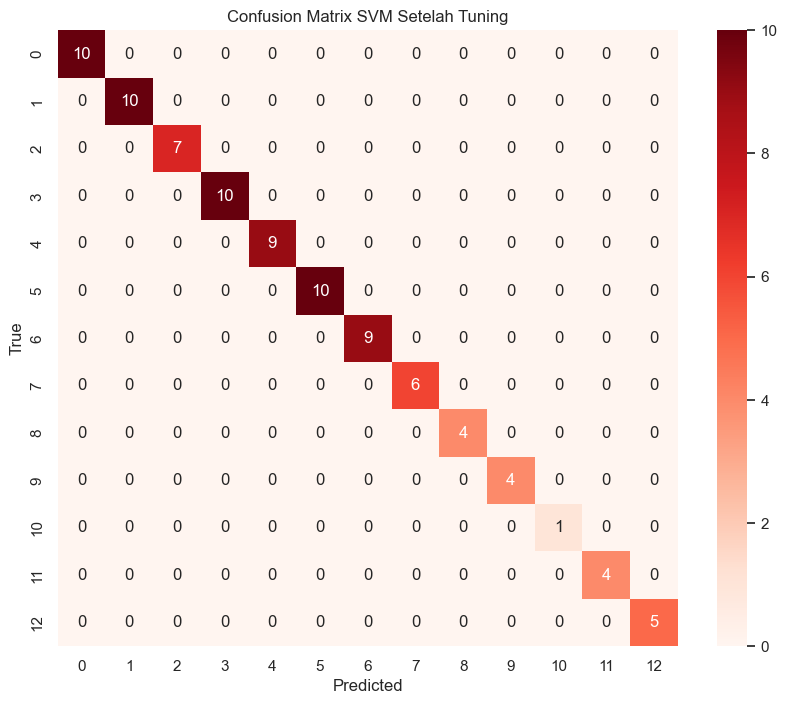

In [8]:
# 1. Preprocessing gambar
images, _ = preprocess_and_save_images(input_folder, output_folder) #Bisa diganti dengan HE

# 2. Preprocessing CSV
csv_path = './data/at/features.csv'
def preprocess_csv(csv_path):
    df = pd.read_csv(csv_path)
    le = LabelEncoder()
    df['ID'] = le.fit_transform(df['ID'])
    return df, le
features, label_encoder = preprocess_csv(csv_path)

# 3. Siapkan X dan y
X = images.reshape(len(images), -1)  # dari gambar (200x200) ke 40000 fitur
y = features['ID'].values            # ambil label ID user

# ===================================
# Split Data
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Ukuran Train: {X_train.shape}, Ukuran Test: {X_test.shape}")

# ===================================
# Training Model SVM
# ===================================
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Prediksi
y_pred_svm = svm.predict(X_test)

# Evaluasi Awal
print("\n=== Evaluasi SVM Sebelum Tuning ===")
print(classification_report(y_test, y_pred_svm))

# ===================================
# Tuning Model SVM (Grid Search)
# ===================================
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

cv = StratifiedKFold(n_splits=5)

grid_search_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search_svm.fit(X_train, y_train)

print("\n=== Hasil Grid Search SVM ===")
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_svm.best_score_}")

# ===================================
# Evaluasi Model Terbaik Setelah Tuning
# ===================================
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

print("\n=== Evaluasi SVM Setelah Tuning ===")
print(classification_report(y_test, y_pred_best_svm))

# ===================================
# Visualisasi Confusion Matrix
# ===================================
cm_svm = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(10,8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix SVM Setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Proses dimulai dengan preprocessing gambar (normalisasi, resize) dan fitur tambahan dari file CSV, diikuti oleh encoding ID label. Data fitur gambar diubah menjadi vektor dan dibagi menjadi data latih dan uji dengan stratifikasi. SVM awal dilatih dan dievaluasi untuk mendapatkan baseline performa. Selanjutnya dilakukan Grid Search dengan Stratified K-Fold Cross Validation untuk mencari kombinasi hyperparameter terbaik, termasuk nilai C, jenis kernel (linear atau rbf), dan metode gamma (scale atau auto). Model terbaik hasil tuning dievaluasi kembali menggunakan classification report dan divisualisasikan melalui confusion matrix. Secara keseluruhan, proses ini mengoptimalkan SVM untuk menghasilkan prediksi identitas wajah yang lebih akurat dan robust.

Pada saat menggunakan SVM, kita dapat melihat ada perbedaan sebelum dan sesudah tunning, pada wajaha ke 4 sebelum tunning, nilai precision tidak mencapai 1.00 sedangkan setelah tunning kita mendapatkan seluruh nilai adalah 1.00, dimana kita mendapatkan parameter terbaik dibandingkan parameter yang digunakan sejak awal.

### KNN

Ukuran Train: (356, 10000), Ukuran Test: (89, 10000)

=== Evaluasi KNN Sebelum Tuning ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         5

    accuracy                           0.99        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.98      0.99      0.98 

c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()


=== Hasil Grid Search KNN ===
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Score: 0.9915884194053209

=== Evaluasi KNN Setelah Tuning ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         5

    accuracy                           0.99  

c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

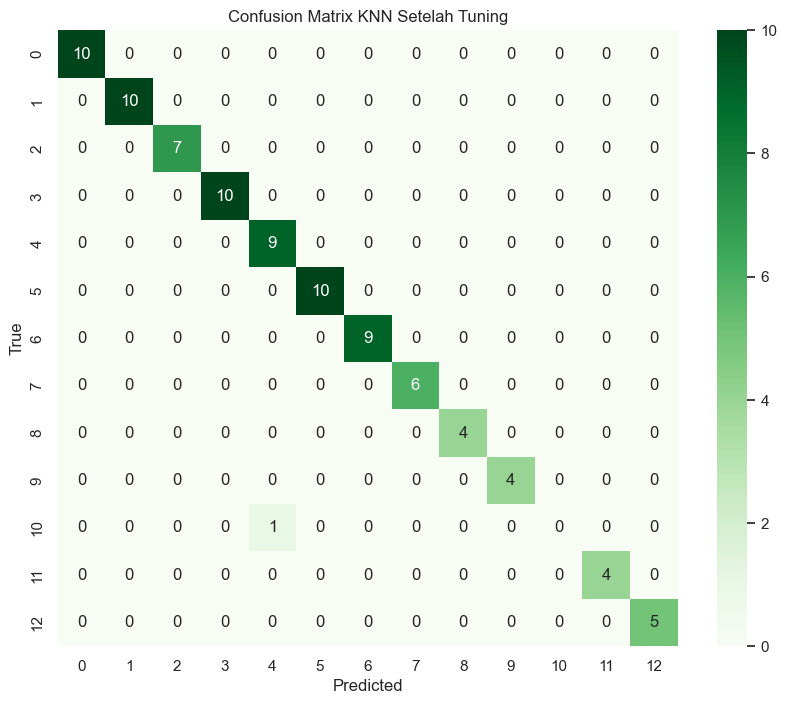

In [9]:
# 1. Preprocessing gambar
images, _ = preprocess_and_save_images(input_folder, output_folder) #Bisa diganti dengan HE

# 2. Preprocessing CSV
csv_path = './data/at/features.csv'
def preprocess_csv(csv_path):
    df = pd.read_csv(csv_path)
    le = LabelEncoder()
    df['ID'] = le.fit_transform(df['ID'])
    return df, le
features, label_encoder = preprocess_csv(csv_path)

# 3. Siapkan X dan y
X = images.reshape(len(images), -1)  # dari gambar (200x200) ke 40000 fitur
y = features['ID'].values            # ambil label ID user

# ===================================
# Split Data
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Ukuran Train: {X_train.shape}, Ukuran Test: {X_test.shape}")

# ===================================
# Training Model KNN
# ===================================
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn.predict(X_test)

# Evaluasi Awal
print("\n=== Evaluasi KNN Sebelum Tuning ===")
print(classification_report(y_test, y_pred_knn))

# ===================================
# Tuning Model KNN (Grid Search)
# ===================================
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

cv = StratifiedKFold(n_splits=5)

grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(X_train, y_train)

print("\n=== Hasil Grid Search KNN ===")
print(f"Best Parameters: {grid_search_knn.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_knn.best_score_}")

# ===================================
# Evaluasi Model Terbaik Setelah Tuning
# ===================================
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

print("\n=== Evaluasi KNN Setelah Tuning ===")
print(classification_report(y_test, y_pred_best_knn))

# ===================================
# Visualisasi Confusion Matrix
# ===================================
cm_knn = confusion_matrix(y_test, y_pred_best_knn)
plt.figure(figsize=(10,8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix KNN Setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Setelah proses preprocessing gambar (resize, normalisasi) dan preprocessing data fitur dari CSV dilakukan, fitur gambar diubah menjadi vektor dan data dibagi menjadi set latih dan uji secara stratified. Model KNN awal dilatih untuk mendapatkan baseline performa. Selanjutnya, dilakukan hyperparameter tuning menggunakan Grid Search dengan Stratified K-Fold Cross Validation untuk mencari kombinasi terbaik dari jumlah tetangga (n_neighbors), tipe bobot (uniform atau distance), dan metrik jarak (euclidean atau manhattan). Model terbaik yang dihasilkan dievaluasi kembali dengan classification report serta divisualisasikan menggunakan confusion matrix, untuk melihat seberapa baik model mengenali identitas wajah setelah optimasi.

Pada saat kita menggunakan KNN, kita melihat bahwa sebelum dan sesudah dilakukan tunning memiliki nilai yang sama namun tidak semua nilai adalah 1, artinya dapat kita simpulkan bahwa KNN kurang cocok dilakukan pada saat facial recogniton.

### Penjelasan

## Pengukuran kinerja / evaluasi model


=== Evaluasi Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         5

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89


=== Evaluasi Random Forest ===
         

c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\herdi\Documents\Proyek ML\facerecog\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

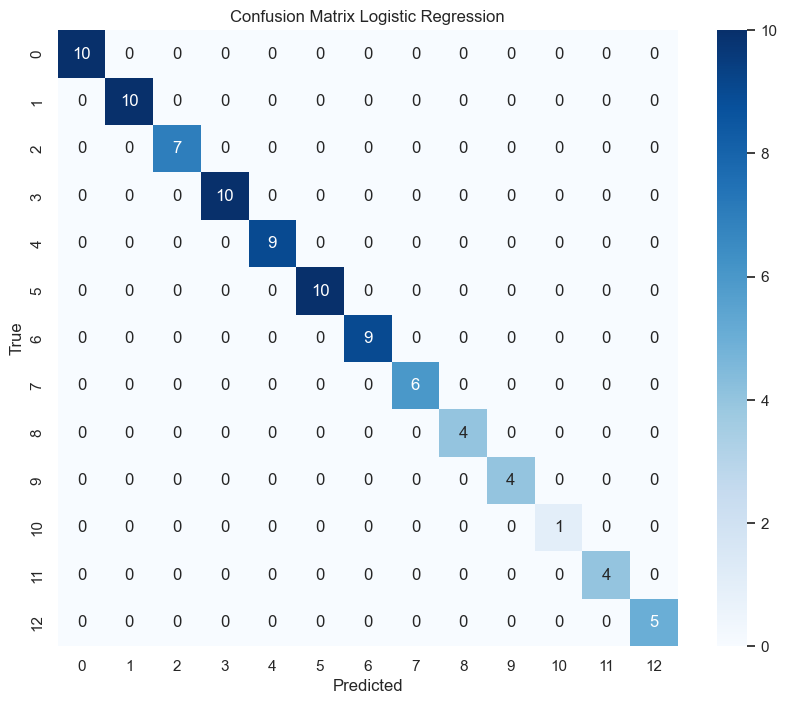

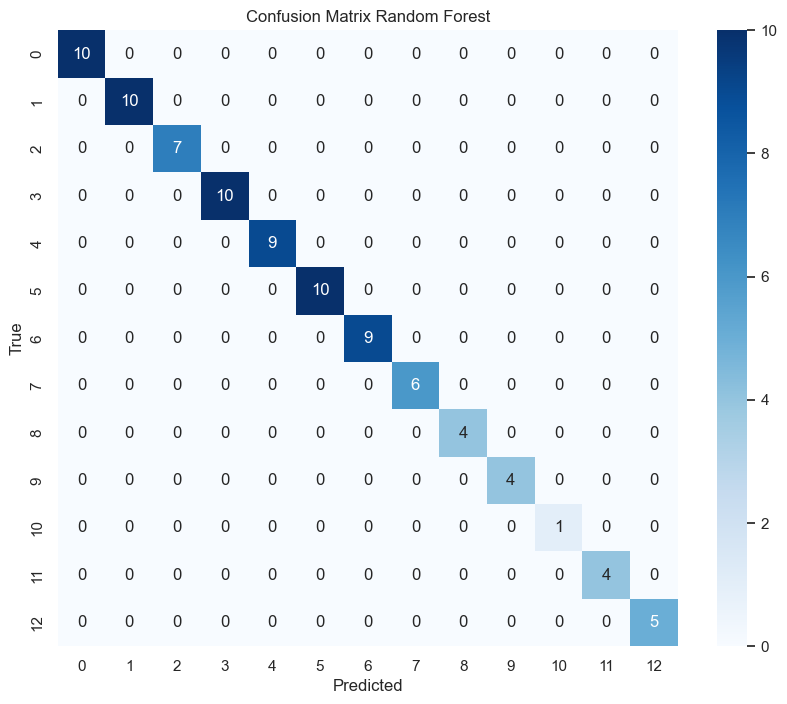

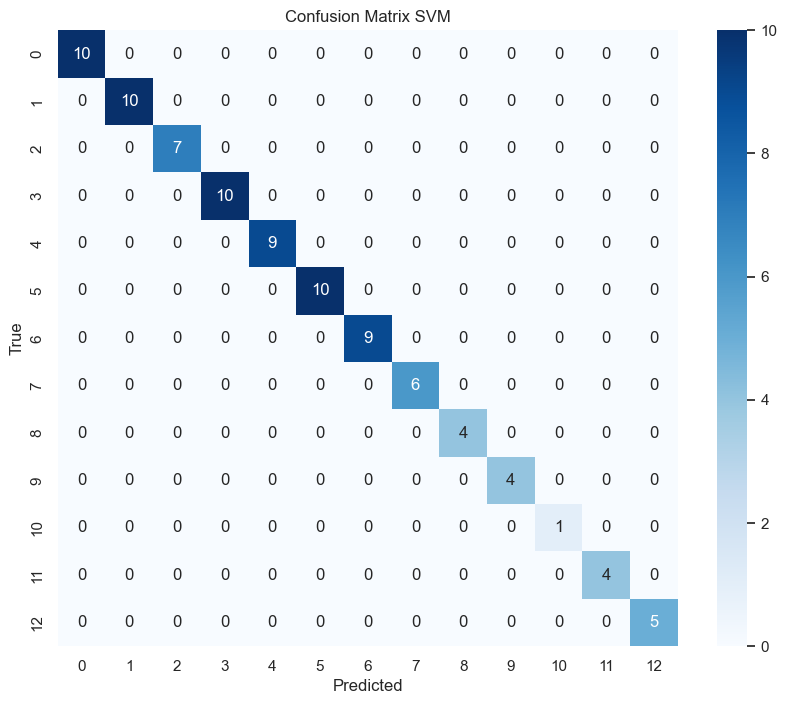

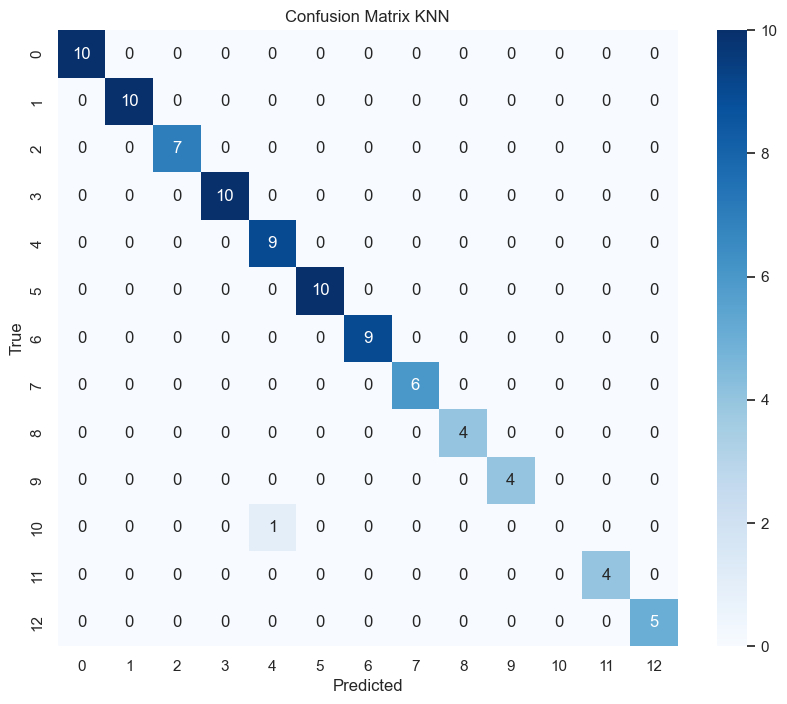

In [12]:
# 1. Preprocessing gambar
images, _ = preprocess_and_save_images(input_folder, output_folder) #Bisa diganti dengan HE

# 2. Preprocessing CSV
csv_path = './data/at/features.csv'
def preprocess_csv(csv_path):
    df = pd.read_csv(csv_path)
    le = LabelEncoder()
    df['ID'] = le.fit_transform(df['ID'])
    return df, le
features, label_encoder = preprocess_csv(csv_path)

# 3. Siapkan X dan y
X = images.reshape(len(images), -1)  # dari gambar (200x200) ke 40000 fitur
y = features['ID'].values            # ambil label ID user

# ===================================
# Split Data
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===================================
# Train Semua Model
# ===================================
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# ===================================
# Evaluasi Semua Model
# ===================================
# Logistic Regression Evaluation
print("\n=== Evaluasi Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg))

# Random Forest Evaluation
print("\n=== Evaluasi Random Forest ===")
print(classification_report(y_test, y_pred_rf))

# SVM Evaluation
print("\n=== Evaluasi SVM ===")
print(classification_report(y_test, y_pred_svm))

# KNN Evaluation
print("\n=== Evaluasi KNN ===")
print(classification_report(y_test, y_pred_knn))

# ===================================
# Visualisasi Confusion Matrix untuk Semua Model
# ===================================
# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10,8))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10,8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10,8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Dalam percobaan face recognition menggunakan empat algoritma klasifikasi, yaitu Logistic Regression, K-Nearest Neighbors (KNN), Random Forest, dan Support Vector Machine (SVM), diperoleh hasil bahwa hampir seluruh model mampu melakukan prediksi dengan akurasi yang baik. Logistic Regression, Random Forest, dan SVM berhasil mengklasifikasikan data wajah dengan benar tanpa kesalahan prediksi. Namun, berbeda dengan ketiga model tersebut, KNN menunjukkan adanya kesalahan dalam prediksi, sehingga performanya sedikit lebih rendah dibandingkan model lainnya. Hal ini menunjukkan bahwa, untuk kasus ini, KNN kurang optimal dibandingkan algoritma yang lain dalam mengenali wajah.

### Penjelasan

## Visualisasi hasil

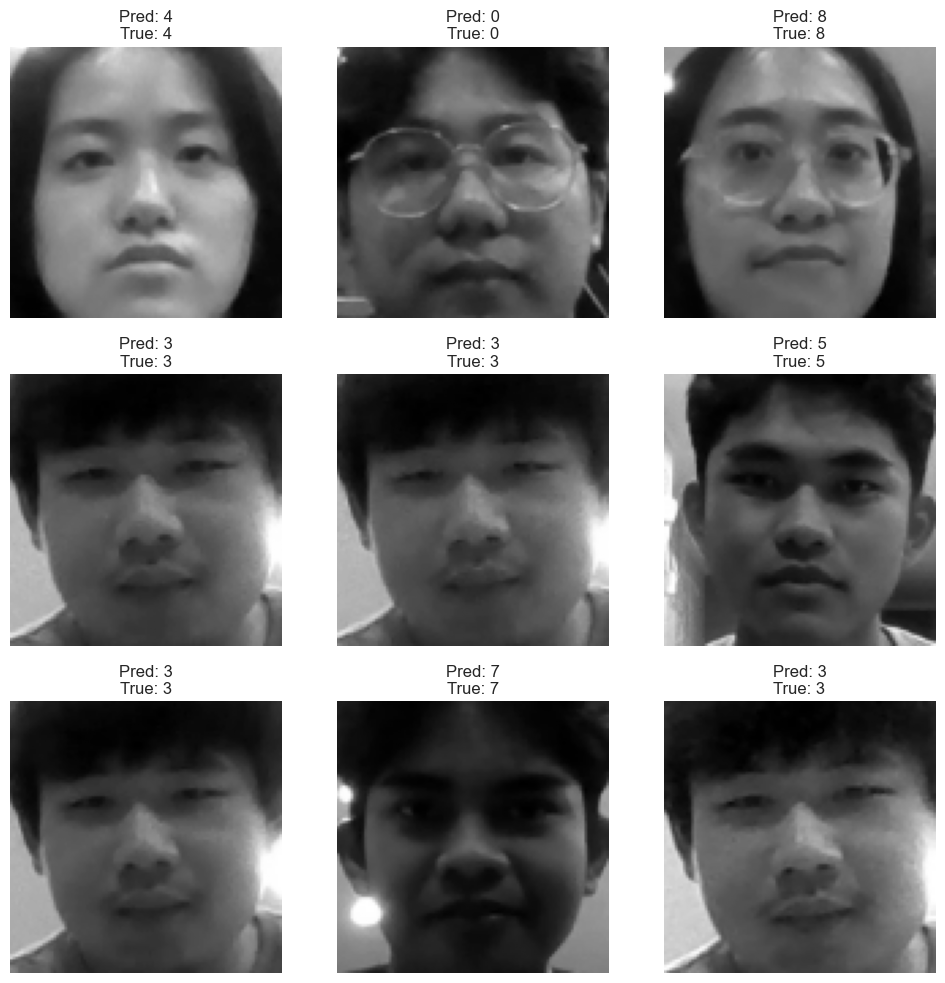

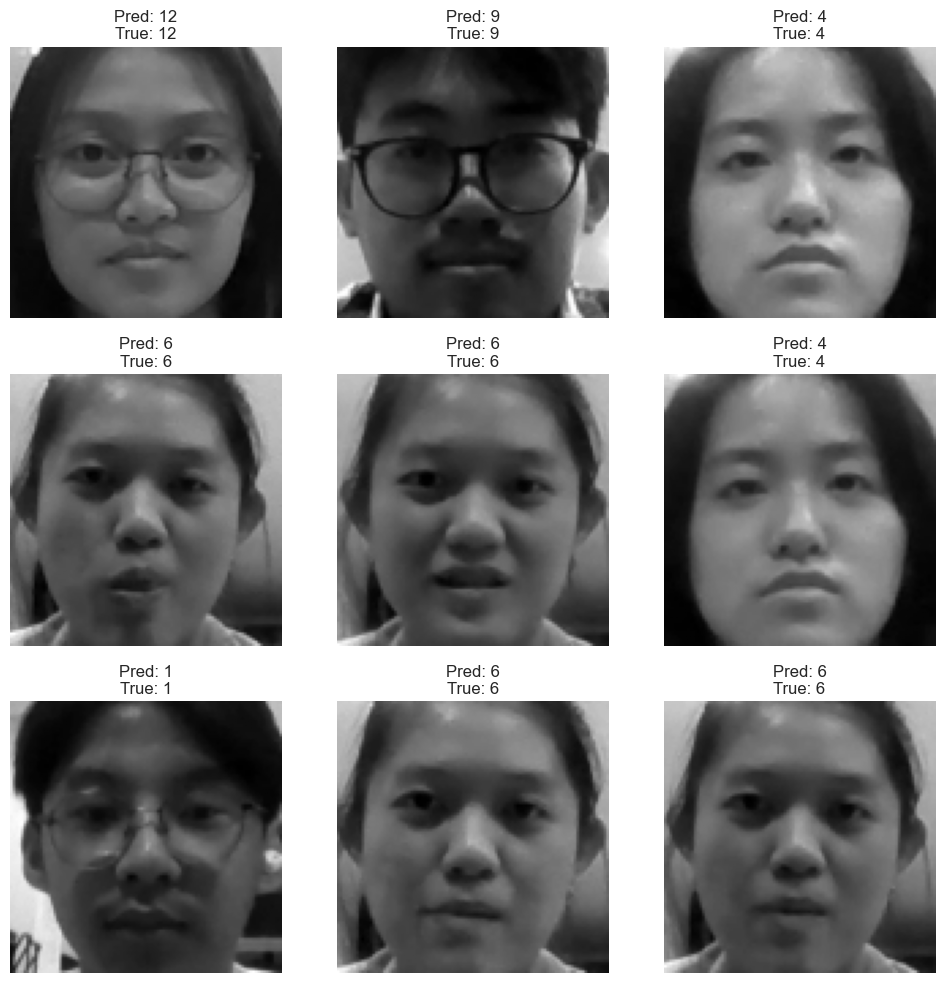

In [11]:
# 1. Preprocessing gambar
images, _ = preprocess_and_save_images(input_folder, output_folder) #Bisa diganti dengan HE

# 2. Preprocessing CSV
csv_path = './data/at/features.csv'
def preprocess_csv(csv_path):
    df = pd.read_csv(csv_path)
    le = LabelEncoder()
    df['ID'] = le.fit_transform(df['ID'])
    return df, le
features, label_encoder = preprocess_csv(csv_path)

# 3. Siapkan X dan y
X = images.reshape(len(images), -1)  # dari gambar (200x200) ke 40000 fitur
y = features['ID'].values            # ambil label ID user

# ===================================
# Split Data
# ===================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===================================
# Train Model (contoh dengan Random Forest)
# ===================================
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)  # Prediksi pada data pelatihan
y_pred_test = rf.predict(X_test)    # Prediksi pada data pengujian

# ===================================
# Visualisasi Hasil pada Data Pelatihan
# ===================================
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

# Ambil beberapa gambar pelatihan dan tampilkan prediksi
for i in np.arange(9):
    ax = axes[i]
    
    # Ambil gambar asli dari X_train dan reshape ke bentuk 200x200
    img = X_train[i].reshape(100, 100)
    
    # Tampilkan gambar
    ax.imshow(img, cmap='gray')
    
    # Prediksi ID menggunakan model
    predicted_label = y_pred_train[i]
    true_label = y_train[i]
    
    # Set judul dengan ID yang diprediksi vs yang sebenarnya
    ax.set_title(f"Pred: {predicted_label}\nTrue: {true_label}")
    
    ax.axis('off')

plt.tight_layout()
plt.show()

# ===================================
# Visualisasi Hasil pada Data Pengujian
# ===================================
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

# Ambil beberapa gambar uji dan tampilkan prediksi
for i in np.arange(9):
    ax = axes[i]
    
    # Ambil gambar asli dari X_test dan reshape ke bentuk 200x200
    img = X_test[i].reshape(100, 100)
    
    # Tampilkan gambar
    ax.imshow(img, cmap='gray')
    
    # Prediksi ID menggunakan model
    predicted_label = y_pred_test[i]
    true_label = y_test[i]
    
    # Set judul dengan ID yang diprediksi vs yang sebenarnya
    ax.set_title(f"Pred: {predicted_label}\nTrue: {true_label}")
    
    ax.axis('off')

plt.tight_layout()
plt.show()


Pada eksperimen ini, gambar wajah diproses menggunakan preprocessing sederhana (resize dan normalisasi), kemudian digunakan untuk membangun model klasifikasi identitas menggunakan Random Forest. Dataset dibagi menjadi data latih dan data uji secara stratified agar proporsi kelas tetap seimbang. Hasil prediksi pada data uji yang divisualisasikan menunjukkan bahwa model mampu mengenali identitas dengan baik, di mana sebagian besar prediksi (Pred) sesuai dengan label sebenarnya (True). Beberapa gambar memperlihatkan kesesuaian antara prediksi dan label, menunjukkan bahwa fitur yang diekstrak dari gambar grayscale sudah cukup representatif untuk tugas identifikasi ini. Namun, karena visualisasi hanya menampilkan sebagian kecil contoh, diperlukan evaluasi lebih lanjut dengan metrik kuantitatif (seperti akurasi, confusion matrix) untuk memastikan performa model secara keseluruhan.

## Kesimpulan

Proyek ini berhasil mengembangkan sistem pengenalan wajah otomatis menggunakan metode machine learning seperti Logistic Regression, Random Forest, SVM, dan KNN. Namun dari hasil yang sudah kita dapat, KNN merupakan satu-satunya model yang terdapat kesalahan prediksi, jadi dapat dipertimbangkan lagi untuk menggunakan KNN dalam sistem pengenalan wajah.
Meski ada keterbatasan dalam variasi data, hasil evaluasi menunjukkan bahwa model bekerja dengan baik. Proyek juga menunjukkan praktik pengembangan yang baik seperti penggunaan pipeline, cross-validation, dan versi kode dengan GitHub. Teknologi ini berpotensi menggantikan sistem identifikasi manual yang kurang aman dan efisien.
